In [94]:
from bs4 import BeautifulSoup
import requests
from datetime import datetime
import dateutil.parser
import pandas as pd

from datetime import datetime, timedelta
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
import pandas as pd
import seaborn as sns

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd


In [74]:
!pip install plotly

    100% |████████████████████████████████| 41.2MB 595kB/s ta 0:00:011
  Stored in directory: /Users/josephdown/Library/Caches/pip/wheels/d7/a9/33/acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [3]:
elevation_df = pd.read_csv("Elevation_v01.csv")

In [48]:
elevation_df.head()

,Sensor,Reading Date,Elevation,Site ID
0,103,"Aug 30, 2017 11:57:32 PM",1.38,100
1,103,"Aug 30, 2017 11:01:32 PM",1.55,100
2,103,"Aug 30, 2017 10:43:32 PM",1.50,100
3,103,"Aug 30, 2017 9:07:32 PM",1.64,100
4,103,"Aug 30, 2017 8:01:32 PM",1.77,100


In [31]:
elevation_df.dtypes

Sensor            int64
Reading Date     object
Elevation       float64
Site ID           int64
dtype: object

In [26]:
elevation_df.columns = ['Sensor', 'Reading Date', 'Elevation', 'Site ID']

In [5]:
harvey_rainfall_df = pd.read_csv("HarveyRainfallReduced_v01.csv")

In [47]:
harvey_rainfall_df.loc[harvey_rainfall_df.Rain>1]

,SiteId,Reading Date From,Reading Date To,Rain
4055,2060,"Aug 26, 2017 2:00:00 AM","Aug 26, 2017 3:00:00 AM",1.32
4358,2030,"Aug 26, 2017 4:00:00 AM","Aug 26, 2017 5:00:00 AM",1.12
4361,2060,"Aug 26, 2017 4:00:00 AM","Aug 26, 2017 5:00:00 AM",1.64
4509,2020,"Aug 26, 2017 5:00:00 AM","Aug 26, 2017 6:00:00 AM",1.64
4510,2025,"Aug 26, 2017 5:00:00 AM","Aug 26, 2017 6:00:00 AM",1.16
4511,2030,"Aug 26, 2017 5:00:00 AM","Aug 26, 2017 6:00:00 AM",1.48
4512,2040,"Aug 26, 2017 5:00:00 AM","Aug 26, 2017 6:00:00 AM",1.24
4513,2050,"Aug 26, 2017 5:00:00 AM","Aug 26, 2017 6:00:00 AM",1.88
4514,2060,"Aug 26, 2017 5:00:00 AM","Aug 26, 2017 6:00:00 AM",2.00
4515,2090,"Aug 26, 2017 5:00:00 AM","Aug 26, 2017 6:00:00 AM",1.96


In [32]:
harvey_rainfall_df.dtypes

SiteId                 int64
Reading Date From     object
Reading Date To       object
Rain                 float64
dtype: object

In [12]:
sensor_locations_df = pd.read_csv("SiteLocations.csv")
sensor_locations_df.head()

,Site ID,Description,Source Address,Latitude,Longitude
0,100,Clear Lake 2nd Outlet @ SH 146,43020,29.554639,-95.025513
1,105,Mary's Creek @ Winding Road,43021,29.543475,-95.217353
2,110,Clear Creek @ I-45,43022,29.507960,-95.11741
3,115,Cowart Creek @ Baker Road,43023,29.513234,-95.222531
4,120,Clear Creek @ FM 528,43024,29.517555,-95.179061


In [33]:
sensor_locations_df.dtypes

Site ID             int64
Description        object
Source Address      int64
Latitude          float64
Longitude          object
dtype: object

In [ ]:
Site Locations.xlsx

In [ ]:
html_page = requests.get('https://www.residentadvisor.net/events/us/houston/week/2019-05-22') 
soup = BeautifulSoup(html_page.content, 'html.parser')

main_soup = soup.find('div', class_="fl col4")


In [50]:
harvey_rainfall_with_locations = sensor_locations_df.join(harvey_rainfall_df, on='Site ID')

In [51]:
harvey_rainfall_with_locations.head()

,Site ID,Description,Source Address,Latitude,Longitude,SiteId,Reading Date From,Reading Date To,Rain
0,100,Clear Lake 2nd Outlet @ SH 146,43020,29.554639,-95.025513,240,"Aug 25, 2017 12:00:00 AM","Aug 25, 2017 1:00:00 AM",0.0
1,105,Mary's Creek @ Winding Road,43021,29.543475,-95.217353,340,"Aug 25, 2017 12:00:00 AM","Aug 25, 2017 1:00:00 AM",0.0
2,110,Clear Creek @ I-45,43022,29.507960,-95.11741,410,"Aug 25, 2017 12:00:00 AM","Aug 25, 2017 1:00:00 AM",0.0
3,115,Cowart Creek @ Baker Road,43023,29.513234,-95.222531,445,"Aug 25, 2017 12:00:00 AM","Aug 25, 2017 1:00:00 AM",0.0
4,120,Clear Creek @ FM 528,43024,29.517555,-95.179061,480,"Aug 25, 2017 12:00:00 AM","Aug 25, 2017 1:00:00 AM",0.0


In [103]:
harvey_rainfall_with_locations.groupby('Site ID')['Rain'].sum().max()

0.44

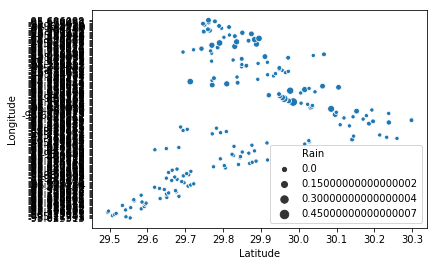

In [63]:
sns.scatterplot(data=harvey_rainfall_with_locations, x='Latitude', y='Longitude', size='Rain')

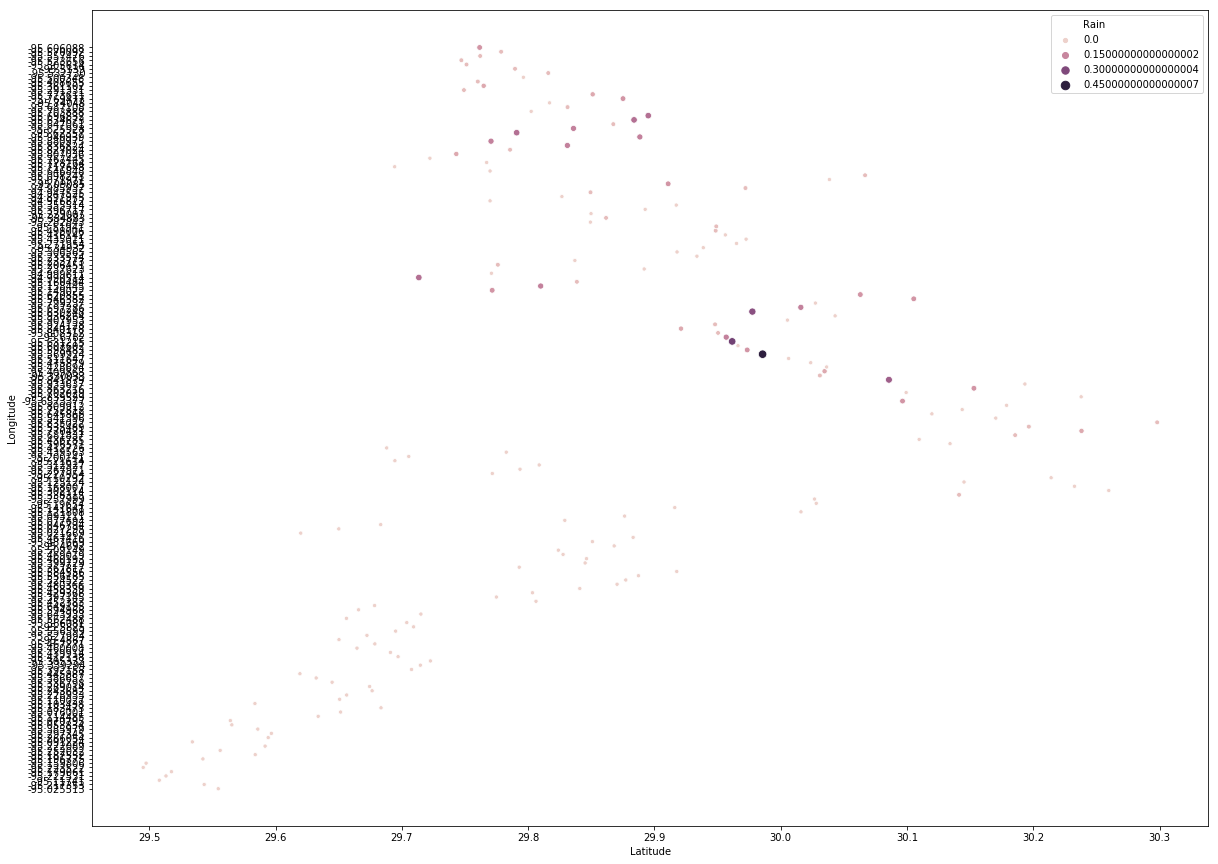

In [71]:
fig, ax = plt.subplots(figsize=(20,15))
sns.scatterplot(data=harvey_rainfall_with_locations, x='Latitude', y='Longitude', size='Rain', hue ='Rain', ax = ax)


In [41]:
#df2.join(elevation_df, on='Site ID')
elevation_df.shape

(76909, 4)

In [ ]:
py.tools.set_credentials_file(username='jdown', api_key='lr1c37zw81')

In [96]:


df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2015_06_30_precipitation.csv')

scl = [0,"rgb(150,0,90)"],[0.125,"rgb(0, 0, 200)"],[0.25,"rgb(0, 25, 255)"],\
[0.375,"rgb(0, 152, 255)"],[0.5,"rgb(44, 255, 150)"],[0.625,"rgb(151, 255, 0)"],\
[0.75,"rgb(255, 234, 0)"],[0.875,"rgb(255, 111, 0)"],[1,"rgb(255, 0, 0)"]

data = [go.Scattergeo(
    lat = harvey_rainfall_with_locations['Latitude'],
    lon = harvey_rainfall_with_locations['Longitude'],
    text = harvey_rainfall_with_locations['Rain'].astype(str) + ' inches',
    marker = dict(
        color = df['Globvalue'],
        colorscale = scl,
        reversescale = True,
        opacity = 0.7,
        size = 2,        
        colorbar = dict(
            thickness = 10,
            titleside = "right",
            outlinecolor = "rgba(68, 68, 68, 0)",
            ticks = "outside",
            ticklen = 3,
            showticksuffix = "last",
            ticksuffix = " inches",
            dtick = 0.1
        )                
    )
)]

layout = dict(
    geo = dict(
        scope = 'north america',
        showland = True,
        landcolor = "rgb(212, 212, 212)",
        subunitcolor = "rgb(255, 255, 255)",
        countrycolor = "rgb(255, 255, 255)",
        showlakes = True,
        lakecolor = "rgb(255, 255, 255)",
        showsubunits = True,
        showcountries = True,
        resolution = 50,
        projection = dict(
            type = 'conic conformal',
            rotation = dict(
                lon = -100
            )
        ),
        lonaxis = dict(
            showgrid = True,
            gridwidth = 0.5,
            range= [ -140.0, -55.0 ],
            dtick = 5
        ),
        lataxis = dict (
            showgrid = True,
            gridwidth = 0.5,
            range= [ 20.0, 60.0 ],
            dtick = 5
        )
    ),
    title = 'Harvey Precipitation',
)

fig = go.Figure(data=data, layout=layout )
#py.offline.plot(fig)
plot_url = py.iplot(fig, filename='my_plot')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~joseph.down/0 or inside your plot.ly account where it is named 'my_plot'


/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [95]:
plotly.tools.set_credentials_file(username='joseph.down', api_key='8symaCKwTe5fxOIJK1A9')

In [ ]:
8symaCKwTe5fxOIJK1A9